# Color formats

Matplotlib recognizes the following formats:

1. Tuple of RGB/RGBA values in the interval [0,1] e.g. `(0.1, 0.2, 0.5, 0.3)`
2. String of hex RGB/RGBA e.g. `"#0f0f0f"`
3. Case-insensitive RGB or RGBA string equivalent hex shorthand of duplicated characters. e.g. `'#abc'` as `'#aabbcc'`
4. For grayscale values, a string of [0,1] e.g. `'0'` is black , `'1'` is white, `'0.8'` is light gray.
5. Case insensitive X11/CSS4 color name with no spaces e.g. `'aquamarine'` and `'mediumseagreen'`
6. A name from the [xkcd color survey](https://xkcd.com/color/rgb/)_,
   prefixed with ``'xkcd:'`` (e.g., ``'xkcd:sky blue'``);
6. Case insensitive Tableau Colors from 'T10' categorical palette e.g.
    - `'tab:blue'`
    - `'tab:orange'`
    - `'tab:red'`
    - ...
7. "CN" color spec where `'C'` precedes a number acting as an index into the default property cycle e.g. `'C0'` and `'C1'`
8. Tuple of one of the above formats and an alpha float e.g. `('green', 0.3)`, `('#f00', 0.9)`

(-0.2, 13.0, -1.0, 1.0)

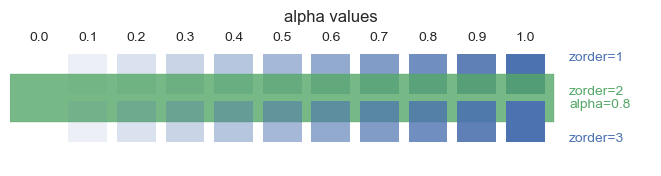

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6.5, 1.65), layout='constrained')
ax.add_patch(Rectangle((-0.2, -0.35), 11.2, 0.7, color='C1', alpha=0.8))
for i, alpha in enumerate(np.linspace(0, 1, 11)):
    ax.add_patch(Rectangle((i, 0.05), 0.8, 0.6, alpha=alpha, zorder=0))
    ax.text(i+0.4, 0.85, f"{alpha:.1f}", ha='center')
    ax.add_patch(Rectangle((i, -0.05), 0.8, -0.6, alpha=alpha, zorder=2))
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.set_title('alpha values')
ax.text(11.3, 0.6, 'zorder=1', va='center', color='C0')
ax.text(11.3, 0, 'zorder=2\nalpha=0.8', va='center', color='C1')
ax.text(11.3, -0.6, 'zorder=3', va='center', color='C0')
ax.axis('off')

The orange rectangle is semi-transparent with *alpha* = 0.8. The  top row of
blue squares is drawn below and the bottom row of blue squares is drawn on
top of the orange rectangle.

See also :doc:`/gallery/misc/zorder_demo` to learn more on the drawing order.


## "CN" color selection

Matplotlib converts "CN" colors to RGBA when drawing Artists. The
`color_cycle` section contains additional
information about controlling colors and style properties.



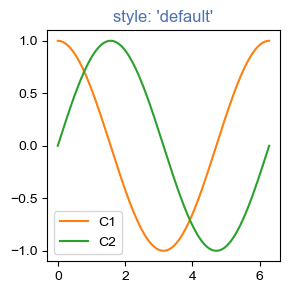

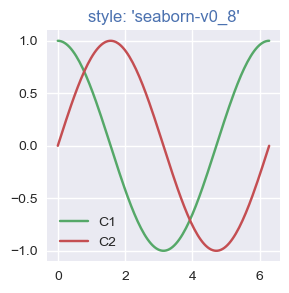

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)


def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title(f'style: {sty!r}', color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()


demo('default')
demo('seaborn-v0_8')

The first color ``'C0'`` is the title. Each plot uses the second and third
colors of each style's :rc:`axes.prop_cycle`. They are ``'C1'`` and ``'C2'``,
respectively.


## Comparison between X11/CSS4 and xkcd colors

The xkcd colors come from a [user survey conducted by the webcomic xkcd](https://blog.xkcd.com/2010/05/03/color-survey-results/)_.

95 out of the 148 X11/CSS4 color names also appear in the xkcd color survey.
Almost all of them map to different color values in the X11/CSS4 and in
the xkcd palette. Only 'black', 'white' and 'cyan' are identical.

For example, ``'blue'`` maps to ``'#0000FF'`` whereas ``'xkcd:blue'`` maps to
``'#0343DF'``.  Due to these name collisions, all xkcd colors have the
``'xkcd:'`` prefix.

The visual below shows name collisions. Color names where color values agree
are in bold.



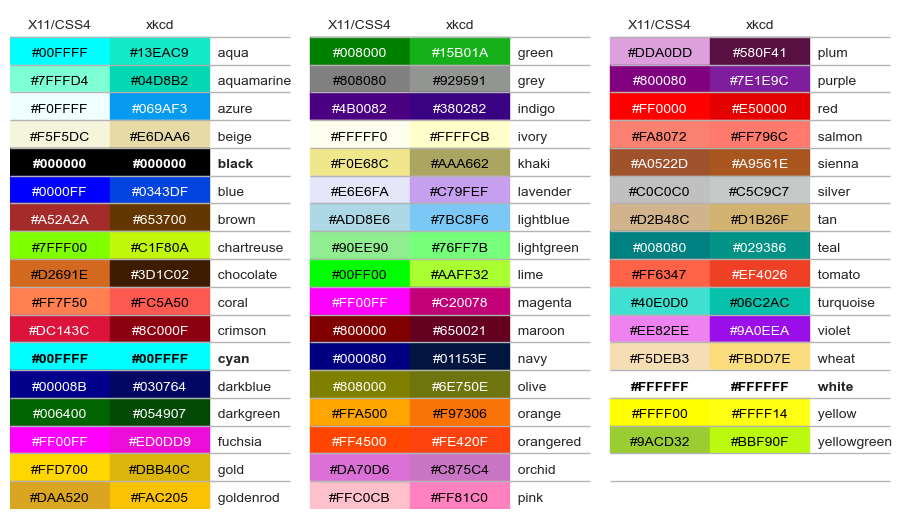

In [4]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]
    xkcd = mcolors.XKCD_COLORS[f'xkcd:{color_name}'].upper()

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = 'k' if luma[0] > 0.5 else 'w'
    xkcd_text_color = 'k' if luma[1] > 0.5 else 'w'

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(fontsize=10, weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4,
            color=css4_text_color, ha='center', **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd,
            color=xkcd_text_color, ha='center', **text_args)
    ax.text(2 + col_shift, y_pos + .7, f'  {color_name}', **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.3, 'X11/CSS4', ha='center')
    ax.text(1.5 + 3*g, -0.3, 'xkcd', ha='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()

# List of named colors [source](https://matplotlib.org/stable/gallery/color/named_colors.html)

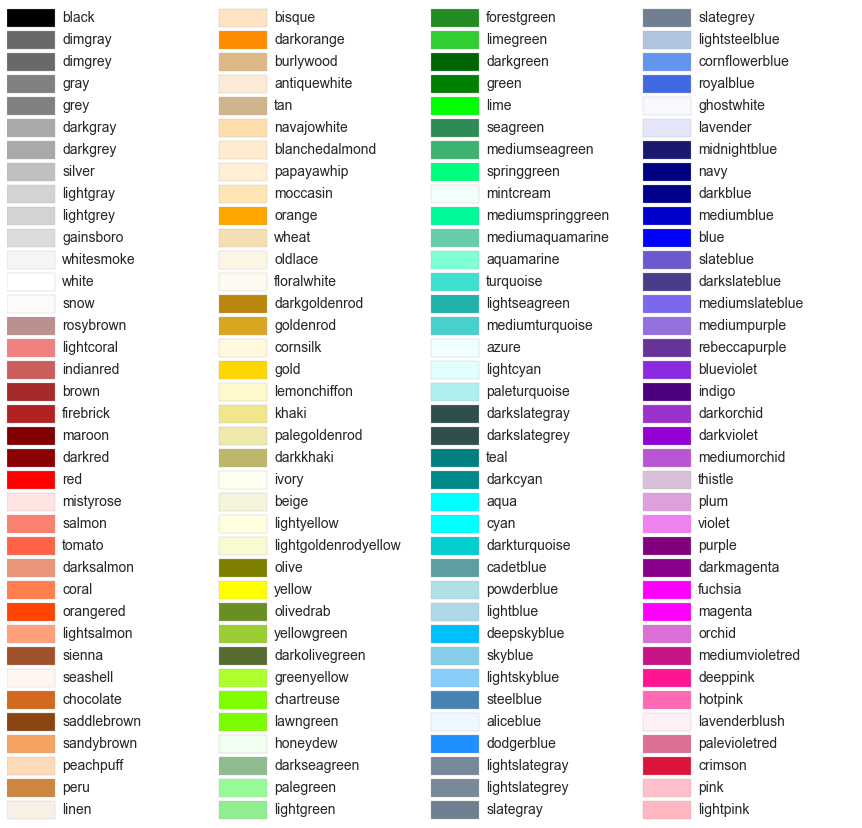

In [6]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.CSS4_COLORS)
plt.show()